131
131


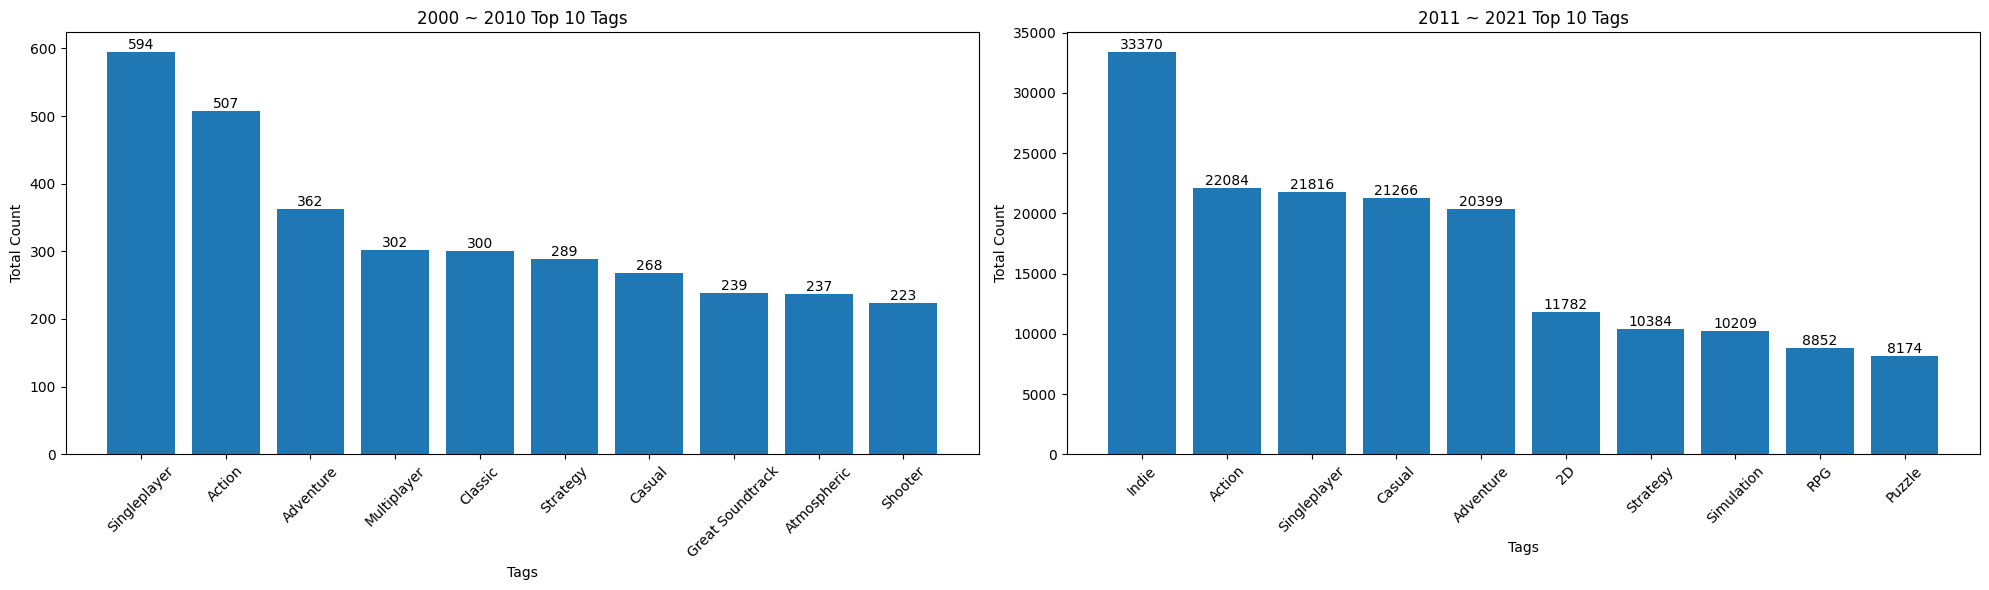

In [5]:
import json
import collections
from datetime import datetime
import matplotlib.pyplot as plt

# 從 JSON 檔案載入遊戲資料
def load_games_from_json(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return json.load(f)

free_games = load_games_from_json('free_games.json')
paid_games = load_games_from_json('paid_games.json')

# 將免費和付費遊戲資料合併
all_games = free_games + paid_games

# 計算每個區間的 Top 10 標籤
def get_top_tags(games, start_year, end_year):
    tag_counts = collections.Counter()
    delcount = 0
    for game in games:
        
        try:
            release_date = datetime.strptime(game['releaseDate'], '%b %d, %Y')
            if start_year <= release_date.year <= end_year:
                tag_counts.update(game['tags'])
        except ValueError:
            delcount += 1
            # print(f"略過格式不正確的日期：{game.get('releaseDate')}")
    print(delcount)
    return tag_counts.most_common(10)

# 2000 ~ 2010 的 Top 10 標籤
top_tags_2000_2010 = get_top_tags(all_games, 2000, 2010)

# 2010 ~ 2023 的 Top 10 標籤
top_tags_2010_2023 = get_top_tags(all_games, 2011, 2021)

# 繪製圖表
def plot_tag_counts(tag_counts, title, ax):
    tags, counts = zip(*tag_counts)
    bars = ax.bar(tags, counts)
    ax.set_xlabel('Tags')
    ax.set_ylabel('Total Count')
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

    # 在每個長條圖上顯示數字
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# 繪製 2000 ~ 2010 的圖表
plot_tag_counts(top_tags_2000_2010, '2000 ~ 2010 Top 10 Tags', axes[0])

# 繪製 2010 ~ 2023 的圖表
plot_tag_counts(top_tags_2010_2023, '2011 ~ 2021 Top 10 Tags', axes[1])

plt.tight_layout()
plt.show()